<a href="https://colab.research.google.com/github/p1306/ShapeAI_Python_Machine_Learning/blob/main/Image%20Classification%20using%20KNN%20with%20HOG%20Features%20Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from fastai.vision.all import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog
from skimage import io, color
from skimage import exposure

In [3]:
# Load the image data
path = "/content/drive/MyDrive/EYE"
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, item_tfms=Resize(224),
                                     batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
                                     size=224, num_workers=4)

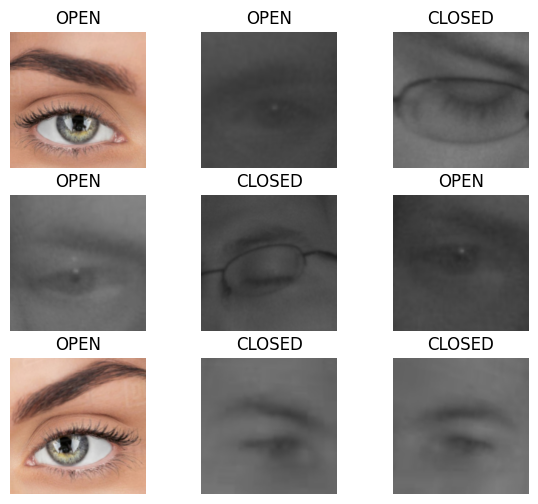

In [21]:
data.show_batch(nrows=3, figsize=(7,6))

In [4]:
# Flatten the images to use raw pixel values as features
def flatten_images(dataloader):
    features = []
    labels = []
    for xb, yb in dataloader:
        features.append(xb.view(xb.size(0), -1).numpy())
        labels.append(yb.numpy())
    return np.concatenate(features), np.concatenate(labels)

In [5]:
train_features, train_labels = flatten_images(data.train)
valid_features, valid_labels = flatten_images(data.valid)

In [6]:
# Fit the StandardScaler on the training features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)


In [7]:
# Create a KNN classifier pipeline
knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=5))  # You can adjust the number of neighbors (n_neighbors) as needed
])


In [8]:
# Fit the KNN classifier on the scaled training features
knn_pipeline.fit(train_features_scaled, train_labels)

Pipeline(steps=[('knn', KNeighborsClassifier())])

In [9]:
# Scale the validation features using the same scaler
valid_features_scaled = scaler.transform(valid_features)

In [10]:
# Use the KNN classifier to predict the labels of the validation features
predicted_labels = knn_pipeline.predict(valid_features_scaled)

In [12]:
# Calculate the accuracy of the KNN classifier
accuracy = (predicted_labels == valid_labels).mean()
print(f"Validation accuracy: {accuracy}")

Validation accuracy: 0.8181818181818182


In [13]:
def extract_hog_features(dataloader):
    features = []
    labels = []
    for xb, yb in dataloader:
        for i in range(xb.size(0)):
            # Transpose the image array to have shape (height, width, 3)
            image = xb[i].numpy().transpose(1, 2, 0)
            gray_image = color.rgb2gray(image)
            hog_features = hog(gray_image, visualize=False)
            features.append(hog_features)
        labels.append(yb.numpy())
    return np.array(features), np.concatenate(labels)

In [14]:
train_features1, train_labels1 = extract_hog_features(data.train)
valid_features1, valid_labels1 = extract_hog_features(data.valid)

In [15]:
# Fit the StandardScaler on the training features
scaler = StandardScaler()
train_features_scaled1 = scaler.fit_transform(train_features1)

In [16]:
# Fit the KNN classifier on the scaled training features
knn_pipeline.fit(train_features_scaled1, train_labels1)

Pipeline(steps=[('knn', KNeighborsClassifier())])

In [17]:
# Scale the validation features using the same scaler
valid_features_scaled1 = scaler.transform(valid_features1)

In [18]:
# Use the KNN classifier to predict the labels of the validation features
predicted_labels = knn_pipeline.predict(valid_features_scaled1)

In [20]:
# Calculate the accuracy of the KNN classifier
accuracy = (predicted_labels == valid_labels).mean()
print(f"Validation accuracy: {accuracy}")

Validation accuracy: 0.9090909090909091
